In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_rows', None)

file_name = "Database_Health_Technology.csv"
df = pd.read_csv(file_name)
df.drop(columns = ['Unnamed: 0','Unnamed: 0.1'],inplace = True)
file_name_y = "Health_Tech_Predicted.csv"
df_y = pd.read_csv(file_name_y)
df = pd.merge(df, df_y, on=['Name'])
df

,Name,Category,total_revenue2018,total_revenue2019,total_revenue2020,operating_income2018,operating_income2019,operating_income2020,net_income2018,net_income2019,...,debt_assets2019,debt_assets2020,debt_equity2018,debt_equity2019,debt_equity2020,long_term_debt2018,long_term_debt2019,long_term_debt2020,Yearly Performance,Volatility
0,ABEO,PharmaG,3.00M,0,10.00M,58.17M,77.09M,48.50M,56.67M,76.28M,...,0.04,0.06,0.00,0.04,0.09,0.00,0.03,0.04,-31.945312,6.001629
1,COCP,PharmaG,0,6.56M,2.01M,9.02M,2.30M,9.59M,49.05M,48.17M,...,0.03,0.01,0.00,0.03,0.01,0.00,0.02,0.01,5.605487,4.597701
2,CPHI,PharmaG,12.33M,10.92M,10.87M,3.97M,3.39M,2.58M,10.75M,20.70M,...,0.30,0.35,0.31,0.72,0.93,0.10,0.10,0.04,52.059335,4.460384
3,JAGX,PharmaG,4.42M,5.78M,9.38M,25.61M,24.30M,26.65M,32.15M,38.54M,...,0.21,0.38,1.12,0.37,0.94,0.00,0.01,0.29,205.232635,6.358382
4,LFVN,PharmaG,225.96M,232.91M,220.18M,9.81M,15.47M,17.61M,7.43M,11.55M,...,0.02,0.23,0.05,0.04,0.49,0.00,0.00,0.20,-35.460993,6.534091
5,TARO,PharmaG,669.89M,644.77M,548.97M,292.52M,246.54M,145.15M,281.78M,244.24M,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-14.683226,3.173752
6,TXMD,PharmaG,16.10M,49.65M,64.87M,130.22M,151.21M,155.54M,132.62M,176.14M,...,0.77,1.37,0.75,22.31,2.01,0.35,0.77,1.36,-53.700787,6.879310
7,ZTS,PharmaG,5.83B,6.26B,6.67B,1.88B,2.02B,2.27B,1.43B,1.50B,...,0.58,0.54,2.95,2.45,1.96,0.60,0.53,0.50,33.095569,2.545707
8,ACRS,PharmaO,6.15M,4.23M,6.48M,83.51M,90.83M,48.52M,132.74M,161.35M,...,0.04,0.20,0.14,0.06,0.38,0.11,0.04,0.19,334.969325,3.047484
9,ACRX,PharmaO,2.15M,2.29M,5.42M,35.73M,54.20M,40.46M,47.15M,53.24M,...,1.33,1.72,24.85,2.94,2.05,0.80,1.27,1.57,-52.033784,12.041116


In [2]:

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return pd.to_numeric(x,errors='ignore')

df_temp = df[['Name','Category']]
df = df.loc[:, ~df.columns.isin(['Name','Category'])].applymap(value_to_float)
df = df.fillna(0)
df = pd.concat([df_temp,df],axis=1)
df.head()


,Name,Category,total_revenue2018,total_revenue2019,total_revenue2020,operating_income2018,operating_income2019,operating_income2020,net_income2018,net_income2019,...,debt_assets2019,debt_assets2020,debt_equity2018,debt_equity2019,debt_equity2020,long_term_debt2018,long_term_debt2019,long_term_debt2020,Yearly Performance,Volatility
0,ABEO,PharmaG,3000000.0,0.0,10000000.0,58170000.0,77090000.0,48500000.0,56670000.0,76280000.0,...,0.04,0.06,0.00,0.04,0.09,0.0,0.03,0.04,-31.945312,6.001629
1,COCP,PharmaG,0.0,6560000.0,2010000.0,9020000.0,2300000.0,9590000.0,49050000.0,48170000.0,...,0.03,0.01,0.00,0.03,0.01,0.0,0.02,0.01,5.605487,4.597701
2,CPHI,PharmaG,12330000.0,10920000.0,10870000.0,3970000.0,3390000.0,2580000.0,10750000.0,20700000.0,...,0.30,0.35,0.31,0.72,0.93,0.1,0.10,0.04,52.059335,4.460384
3,JAGX,PharmaG,4420000.0,5780000.0,9380000.0,25610000.0,24300000.0,26650000.0,32150000.0,38540000.0,...,0.21,0.38,1.12,0.37,0.94,0.0,0.01,0.29,205.232635,6.358382
4,LFVN,PharmaG,225960000.0,232910000.0,220180000.0,9810000.0,15470000.0,17610000.0,7430000.0,11550000.0,...,0.02,0.23,0.05,0.04,0.49,0.0,0.00,0.20,-35.460993,6.534091


In [3]:
df.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 446
Data columns (total 109 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    Name                              447 non-null    object 
 1    Category                          447 non-null    object 
 2    total_revenue2018                 447 non-null    float64
 3    total_revenue2019                 447 non-null    float64
 4    total_revenue2020                 447 non-null    float64
 5    operating_income2018              447 non-null    float64
 6    operating_income2019              447 non-null    float64
 7    operating_income2020              447 non-null    float64
 8    net_income2018                    447 non-null    float64
 9    net_income2019                    447 non-null    float64
 10   net_income2020                    447 non-null    float64
 11   diluted_EPS2018                   447 non-null    float6

In [4]:
df.describe()

,total_revenue2018,total_revenue2019,total_revenue2020,operating_income2018,operating_income2019,operating_income2020,net_income2018,net_income2019,net_income2020,diluted_EPS2018,...,debt_assets2019,debt_assets2020,debt_equity2018,debt_equity2019,debt_equity2020,long_term_debt2018,long_term_debt2019,long_term_debt2020,Yearly Performance,Volatility
count,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02,4.470000e+02,447.000000,...,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,1.180112e+09,1.224986e+09,1.413225e+09,3.137227e+08,3.335042e+08,3.476149e+08,2.188204e+08,2.535385e+08,2.829303e+08,137.916018,...,2.121074,0.243266,1.060805,1.457718,1.333669,0.281051,1.987092,0.188658,14.220584,6.256387
std,6.639943e+09,6.757133e+09,7.533222e+09,1.774497e+09,1.838510e+09,1.846171e+09,1.187009e+09,1.253798e+09,1.308183e+09,1915.526372,...,24.575842,0.484451,5.804057,7.953640,7.224303,0.818485,24.528352,0.402502,96.106225,5.695496
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-89.009009,0.160917
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.032500e+07,1.412500e+07,1.411500e+07,1.067000e+07,1.362000e+07,1.413000e+07,0.475000,...,0.020000,0.010000,0.000000,0.025000,0.020000,0.000000,0.010000,0.010000,-40.501128,3.606594
50%,2.040000e+06,3.650000e+06,5.880000e+06,2.182000e+07,3.000000e+07,3.600000e+07,2.237000e+07,3.077000e+07,3.735000e+07,1.190000,...,0.110000,0.090000,0.050000,0.190000,0.140000,0.000000,0.080000,0.050000,-7.445726,4.863636
75%,6.306000e+07,7.927000e+07,1.119150e+08,6.061500e+07,7.496000e+07,8.328000e+07,5.959500e+07,7.724500e+07,8.975000e+07,2.835000,...,0.365000,0.325000,0.715000,0.865000,0.765000,0.230000,0.320000,0.270000,40.062657,7.170393
max,8.153000e+10,8.211000e+10,8.257000e+10,2.125000e+10,2.155000e+10,2.047000e+10,1.530000e+10,1.512000e+10,1.471000e+10,28660.000000,...,367.210000,6.290000,108.340000,154.150000,103.440000,11.600000,367.210000,6.210000,968.725869,60.059613


In [5]:
df_temp1 = df['total_revenue2020']
numzerorecords = (df == 0).astype(int).sum(axis=0)
dropcols = numzerorecords.where(numzerorecords>=50) #drop features where there are too many null values
df = df.loc[:, (df == 0).astype(int).sum(axis=0) <= 50]
df = pd.concat([df_temp1,df],axis=1)
df['binary_revenue']=np.where(df['total_revenue2020']<=0,0,1)


In [6]:
numzerorecords

Name                                  0
Category                              0
total_revenue2018                   176
total_revenue2019                   162
total_revenue2020                   145
operating_income2018                  5
operating_income2019                  5
operating_income2020                  5
net_income2018                        5
net_income2019                        5
net_income2020                        5
diluted_EPS2018                      13
diluted_EPS2019                       6
diluted_EPS2020                      13
EBITDA2018                           14
EBITDA2019                            5
EBITDA2020                            5
total_assets2018                      6
total_assets2019                      5
total_assets2020                      7
total_liability2018                   6
total_liability2019                   5
total_liability2020                   5
total_equity2018                      6
total_equity2019                      5


In [7]:
df_final = df[df.columns.drop(list(df.filter(regex='2018')))]
df_final.columns

Index(['total_revenue2020', 'Name', 'Category', 'operating_income2019',
       'operating_income2020', 'net_income2019', 'net_income2020',
       'diluted_EPS2019', 'diluted_EPS2020', 'EBITDA2019', 'EBITDA2020',
       'total_assets2019', 'total_assets2020', 'total_liability2019',
       'total_liability2020', 'total_equity2019', 'total_equity2020',
       'total_liability_shareholders2019', 'total_liability_shareholders2020',
       'total_debt2020', 'book_value2019', 'book_value2020',
       'cash_operating2019', 'cash_operating2020', 'cash_investing2019',
       'cash_investing2020', 'cash_financing2019', 'cash_financing2020',
       'free_cash_flow2019', 'free_cash_flow2020', 'entreprise_value2020',
       'return_asset2019', 'return_asset2020', 'return_equity2020',
       'return_capital2019', 'return_capital2020', 'quick_ratio2019',
       'quick_ratio2020', 'current_ratio2019', 'current_ratio2020',
       'Yearly Performance', 'Volatility', 'binary_revenue'],
      dtype='object

In [8]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1)
df_final['operating_income_change'] = percentage_change(df_final['operating_income2019'],df_final['operating_income2020'])
df_final['net_income_change'] = percentage_change(df_final['net_income2019'],df_final['net_income2020'])
df_final['EBITDA_change'] = percentage_change(df_final['EBITDA2019'],df_final['EBITDA2020'])
df_final['book_value_change'] = percentage_change(df_final['book_value2019'],df_final['book_value2020'])
df_final['ROA_change'] = percentage_change(df_final['return_asset2019'],df_final['return_asset2020'])
df_final['ROC_change'] = percentage_change(df_final['return_capital2019'],df_final['return_capital2020'])
df_final['quick_ratio_change'] = percentage_change(df_final['quick_ratio2019'],df_final['quick_ratio2020'])
df_final['current_ratio_change'] = percentage_change(df_final['current_ratio2019'],df_final['current_ratio2020'])

df_final.head()

,total_revenue2020,Name,Category,operating_income2019,operating_income2020,net_income2019,net_income2020,diluted_EPS2019,diluted_EPS2020,EBITDA2019,...,Volatility,binary_revenue,operating_income_change,net_income_change,EBITDA_change,book_value_change,ROA_change,ROC_change,quick_ratio_change,current_ratio_change
0,10000000.0,ABEO,PharmaG,77090000.0,48500000.0,76280000.0,84230000.0,1.51,1.19,68410000.0,...,6.001629,1,-0.370865,0.104221,-0.372899,-0.497653,0.172881,0.197410,-0.318713,-0.318713
1,2010000.0,COCP,PharmaG,2300000.0,9590000.0,48170000.0,9650000.0,1.51,1.75,2050000.0,...,4.597701,1,3.169565,-0.799668,3.512195,0.027397,-0.717215,-0.763914,5.919890,5.919890
2,10870000.0,CPHI,PharmaG,3390000.0,2580000.0,20700000.0,2870000.0,0.47,0.25,463940.0,...,4.460384,1,-0.238938,-0.861353,-0.781911,-0.142857,-0.783965,-0.686924,-0.300000,-0.160714
3,9380000.0,JAGX,PharmaG,24300000.0,26650000.0,38540000.0,33810000.0,27.02,459.82,22370000.0,...,6.358382,1,0.096708,-0.122730,0.089405,-0.102041,-0.142685,-0.386763,1.375000,1.177419
4,220180000.0,LFVN,PharmaG,15470000.0,17610000.0,11550000.0,12890000.0,0.79,0.50,20570000.0,...,6.534091,1,0.138332,0.116017,0.139524,0.163793,-0.073653,-0.216174,0.058333,0.091429


In [9]:
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='2019')))]
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='total')))]
df_final.drop(columns = ['Category','operating_income2020','net_income2020','EBITDA2020','return_asset2020','return_capital2020','quick_ratio2020','current_ratio2020'],inplace= True)



In [10]:
df_final.columns

Index(['Name', 'diluted_EPS2020', 'book_value2020', 'cash_operating2020',
       'cash_investing2020', 'cash_financing2020', 'free_cash_flow2020',
       'entreprise_value2020', 'return_equity2020', 'Yearly Performance',
       'Volatility', 'binary_revenue', 'operating_income_change',
       'net_income_change', 'EBITDA_change', 'book_value_change', 'ROA_change',
       'ROC_change', 'quick_ratio_change', 'current_ratio_change'],
      dtype='object')

In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,100))

In [12]:
df_final[['diluted_EPS2020', 'book_value2020', 'cash_operating2020',
       'cash_investing2020', 'cash_financing2020', 'free_cash_flow2020',
       'entreprise_value2020', 'return_equity2020']] = min_max_scaler.fit_transform(df_final[['diluted_EPS2020', 'book_value2020', 'cash_operating2020',
       'cash_investing2020', 'cash_financing2020', 'free_cash_flow2020',
       'entreprise_value2020', 'return_equity2020']])
df_final = df_final[['Name', 'diluted_EPS2020', 'book_value2020', 'cash_operating2020',
       'cash_investing2020', 'cash_financing2020', 'free_cash_flow2020',
       'entreprise_value2020', 'return_equity2020', 'binary_revenue', 'operating_income_change',
       'net_income_change', 'EBITDA_change', 'book_value_change', 'ROA_change',
       'ROC_change', 'quick_ratio_change', 'current_ratio_change', 'Yearly Performance',
       'Volatility']]

<AxesSubplot:>

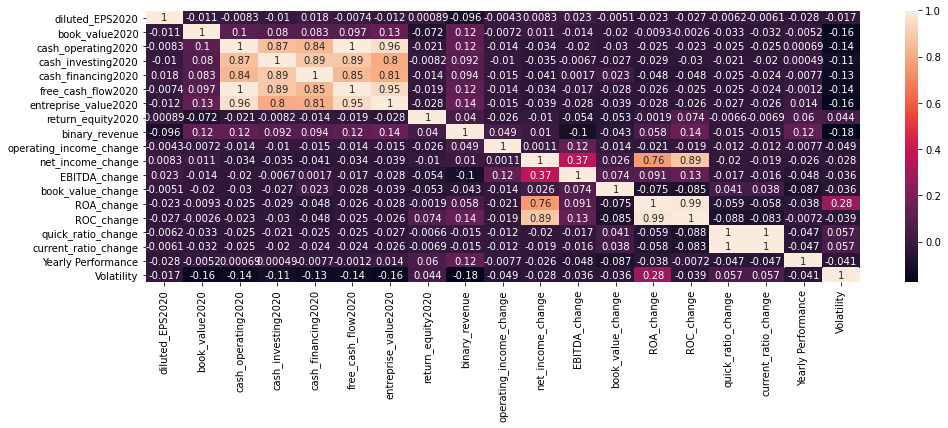

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#df_test.corr()
plt.figure(figsize = (16,5))
sns.heatmap(data=df_final.corr(), annot=True)

In [14]:
df_final.drop(columns = ['quick_ratio_change','net_income_change','cash_financing2020','cash_investing2020','ROC_change'],inplace= True)

In [15]:
df_final['Yearly Performance'] = df_final['Yearly Performance'].div(100)
df_final.drop(columns = ['Name','Volatility'],inplace = True)
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final.fillna(0,inplace=True)

df_final.columns

Index(['diluted_EPS2020', 'book_value2020', 'cash_operating2020',
       'free_cash_flow2020', 'entreprise_value2020', 'return_equity2020',
       'binary_revenue', 'operating_income_change', 'EBITDA_change',
       'book_value_change', 'ROA_change', 'current_ratio_change',
       'Yearly Performance'],
      dtype='object')

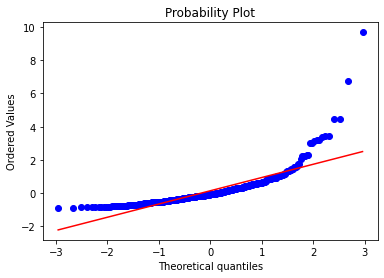

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab 
stats.probplot(df_final['Yearly Performance'], dist="norm", plot=pylab)
pylab.show()

In [17]:
df_final = df_final[df_final['Yearly Performance'].abs()<=2]
df_final.shape[0]

429

In [18]:
print(df_final['Yearly Performance'].mean())
print(df_final['Yearly Performance'].std())


-0.0020766186564102683
0.5483953972235465


In [19]:
threshold = 0.68

diluted_EPS2020


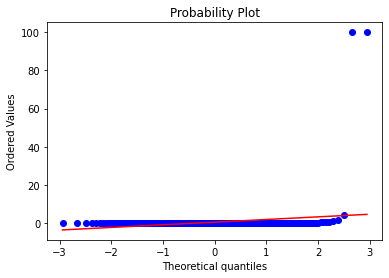

book_value2020


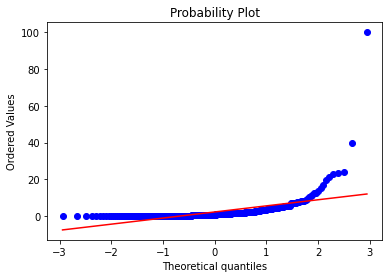

cash_operating2020


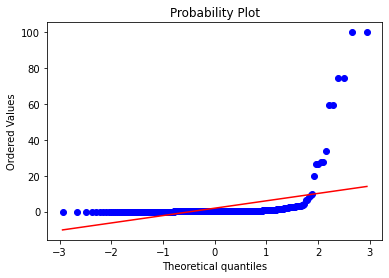

free_cash_flow2020


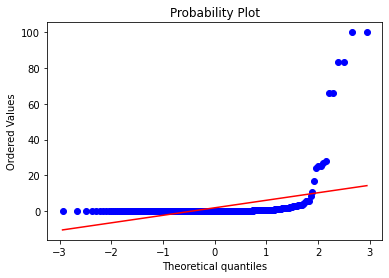

entreprise_value2020


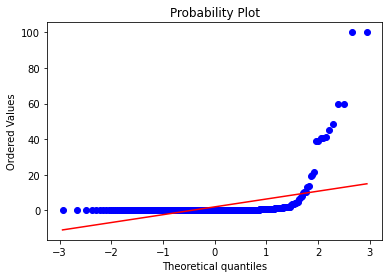

return_equity2020


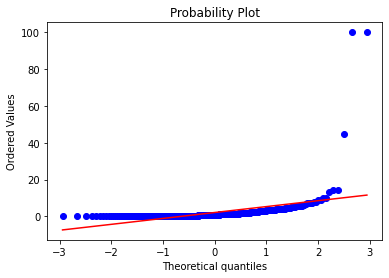

binary_revenue


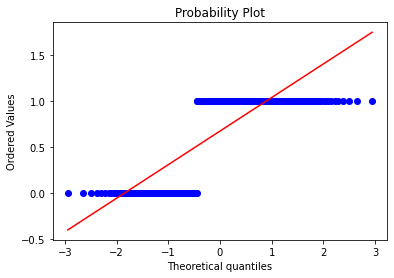

operating_income_change


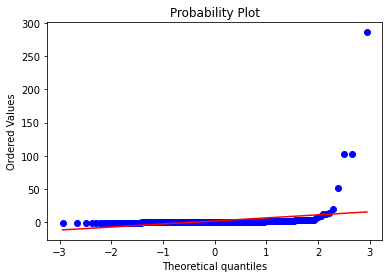

EBITDA_change


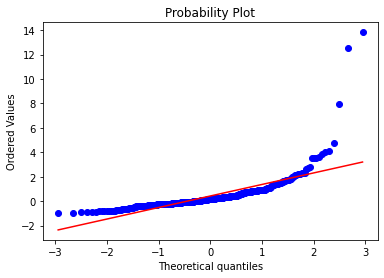

book_value_change


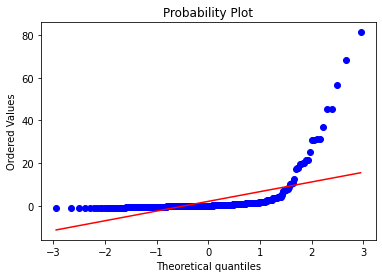

ROA_change


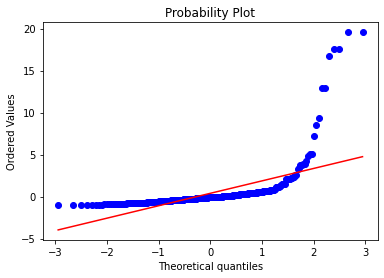

current_ratio_change


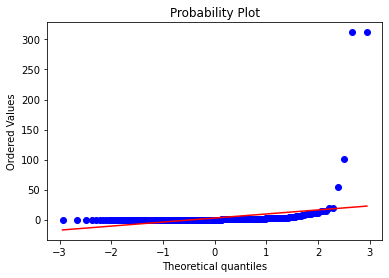

Yearly Performance


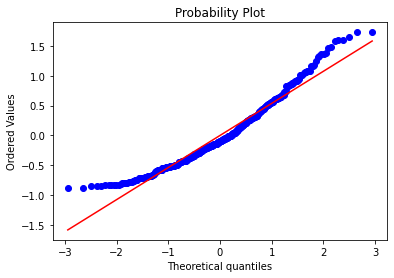

In [20]:
for col in df_final.columns: #remove outliers
    stats.probplot(df_final[col], dist="norm", plot=pylab)
    print(col)
    pylab.show()

In [21]:
df_final = df_final[df_final['diluted_EPS2020'].abs()<=20]
df_final = df_final[df_final['book_value2020'].abs()<=30]
df_final = df_final[df_final['cash_operating2020'].abs()<=40]
df_final = df_final[df_final['free_cash_flow2020'].abs()<=40]
df_final = df_final[df_final['entreprise_value2020'].abs()<=40]
df_final = df_final[df_final['return_equity2020'].abs()<=40]
df_final = df_final[df_final['operating_income_change'].abs()<=50]
df_final = df_final[df_final['EBITDA_change'].abs()<=6]
df_final = df_final[df_final['book_value_change'].abs()<=40]
df_final = df_final[df_final['current_ratio_change'].abs()<=50]
df_final.shape[0]


397

In [22]:
# for col in df.columns:
#     stats.probplot(df[col], dist="norm", plot=pylab)
#     print(col)
#     pylab.show()

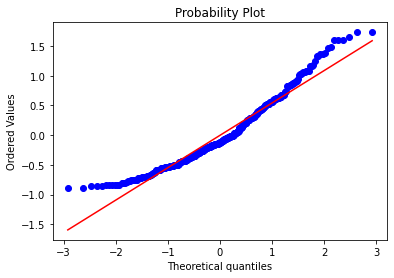

In [23]:
df_final['Y']=np.where(df_final['Yearly Performance'].abs()<threshold,0,1)
stats.probplot(df_final['Yearly Performance'], dist="norm", plot=pylab)
pylab.show()

In [24]:
df_final[df_final['Y'].abs()==0].shape[0]

318

In [25]:
df_final[df_final['Y'].abs()==1].shape[0]

79

In [26]:
df_final.drop(columns = ['Yearly Performance'],inplace = True)

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size = 0.3)
x_train = train.iloc[0:,0:11]
y_train = train['Y']
x_test = test.iloc[0:,0:11]
y_test = test['Y']

In [28]:
from sklearn import linear_model
from sklearn import metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
def roc_draw(y_test,y_pred):
    
    (fpr, tpr, thresholds) = roc_curve(y_test,y_pred)

    area = auc(fpr,tpr)
    plt.clf() #Clear the current figure
    plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)
    plt.plot([0, 1], [0, 1], 'k')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc="lower right")
def get_classification(predictions,threshold):
    classes = np.zeros_like(predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes
def m_eval(test,predicted,threshold):
    
    tn, fp, fn, tp = confusion_matrix(test,get_classification(predicted,threshold)).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    #print(tn, fp, fn, tp)
    #print(accuracy)
    return accuracy


In [29]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
y_pred  = model.predict(x_test)
y_pred.round(2)
model.coef_

array([ 0.48625689, -0.01060321,  0.22118854, -0.1976993 , -0.01339478,
        0.03777184,  0.02780205, -0.00274357, -0.01963854, -0.00221346,
        0.02075679])

Accuracy: 0.7833333333333333


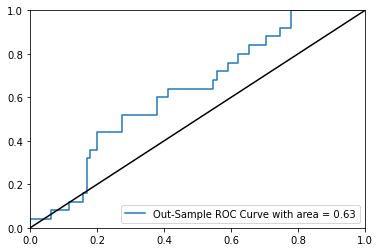

In [30]:
accuracy = m_eval(y_test,y_pred,threshold)
print("Accuracy:",accuracy)
roc_draw(y_test,y_pred)

Accuracy: 0.775


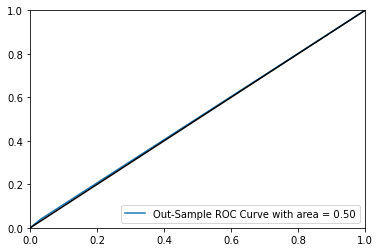

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print("Accuracy:",accuracy)
roc_draw(y_test,y_pred)

Accuracy: 0.7833333333333333


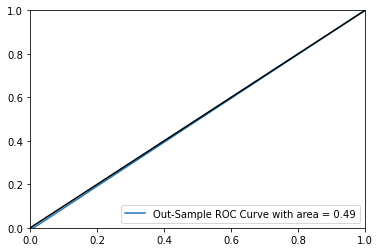

In [32]:
from sklearn import svm

model = svm.SVC(kernel='linear') 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = sm.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
roc_draw(y_test,y_pred)

[19:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8333333333333334


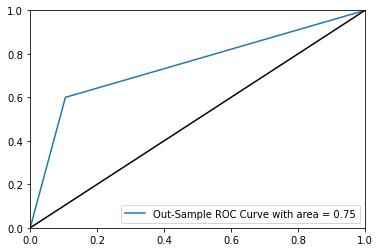

In [33]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = sm.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
roc_draw(y_test,y_pred)

Accuracy: 0.8166666666666667


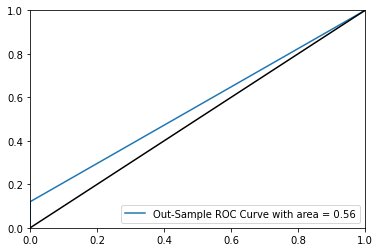

In [34]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(6,8,6), activation='relu', solver='adam', max_iter=500)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = sm.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
roc_draw(y_test,y_pred)